In [1]:
from time import time

from wavenet.utils import make_batch
from wavenet.models import Model, Generator

from IPython.display import Audio

%matplotlib inline

inputs, targets = make_batch('assets/voice.wav')
num_time_samples = inputs.shape[1]
num_channels = 1
gpu_fraction = 1.0

model = Model(num_time_samples=num_time_samples,
              num_channels=num_channels,
              gpu_fraction=gpu_fraction)

Audio(inputs.reshape(inputs.shape[1]), rate=44100)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


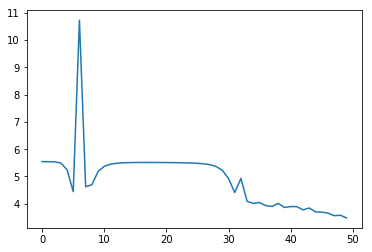

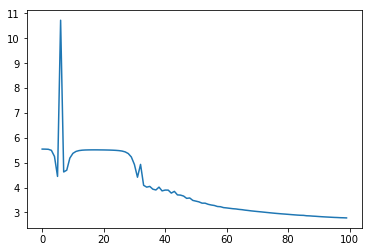

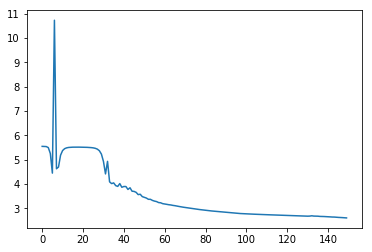

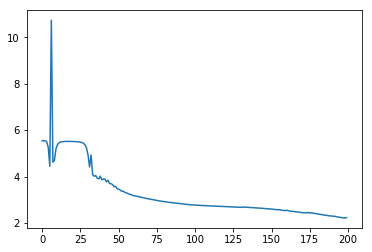

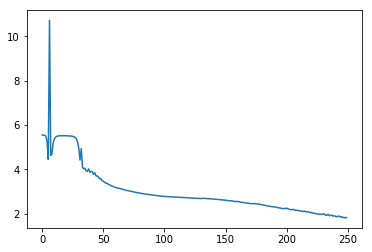

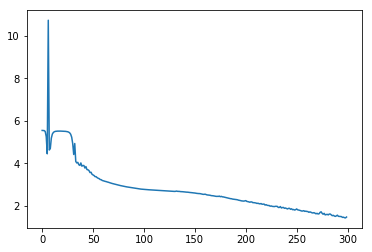

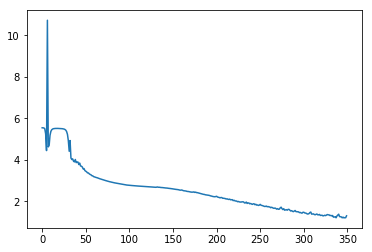

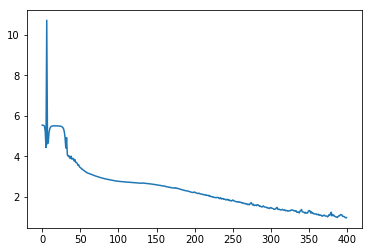

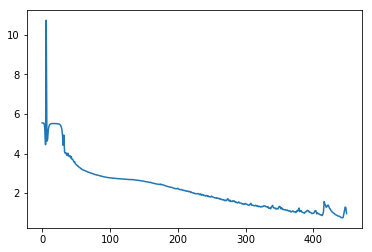

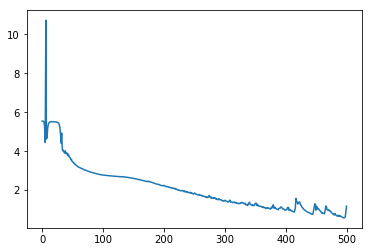

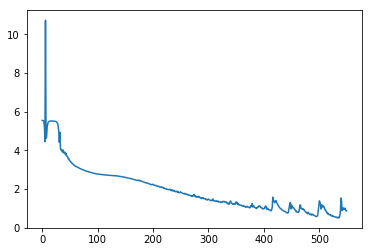

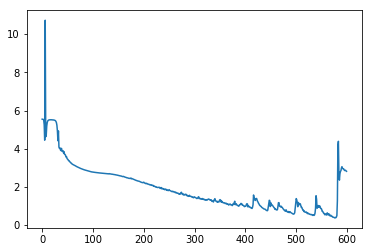

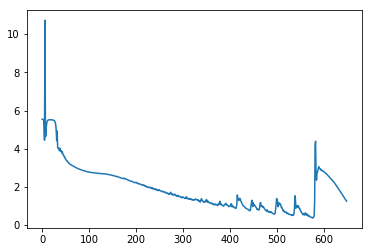

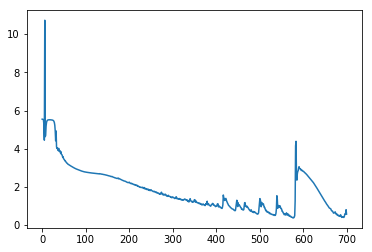

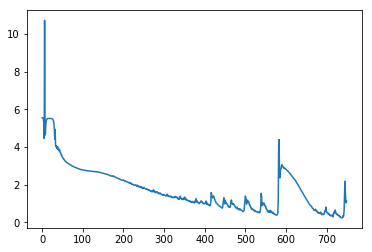

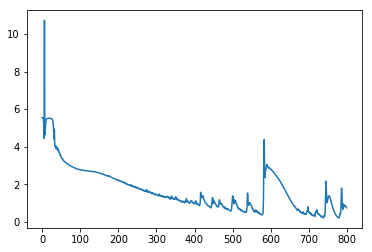

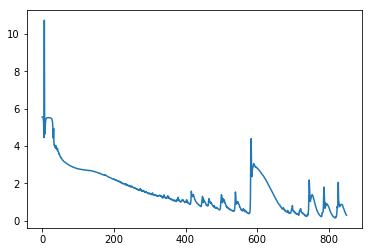

Training took 14771.6178141 seconds.


In [2]:
tic = time()
model.train(inputs, targets)
toc = time()

print('Training took {} seconds.'.format(toc-tic))

Make Generator.


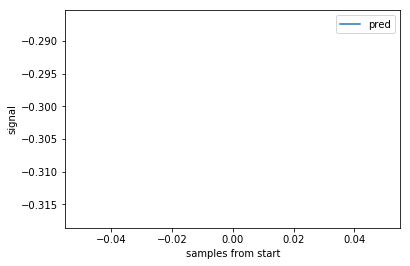

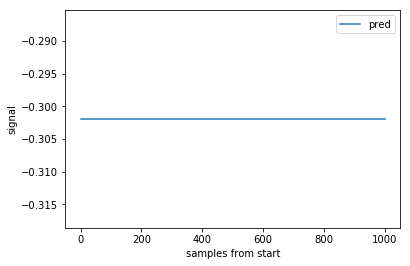

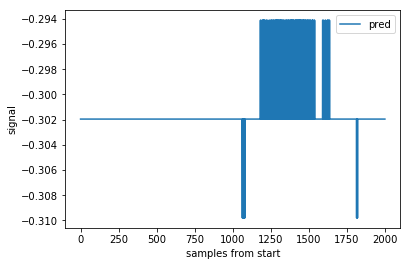

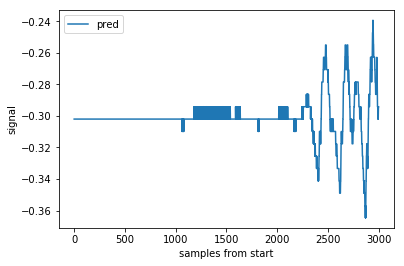

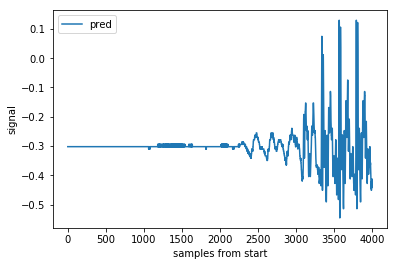

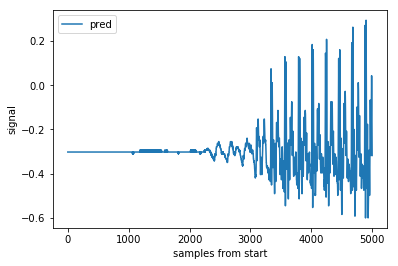

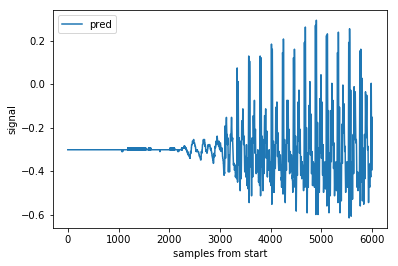

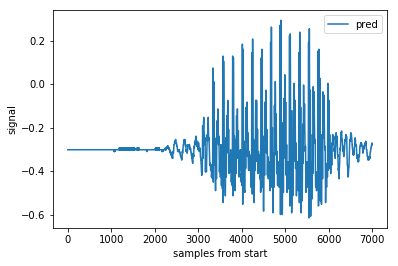

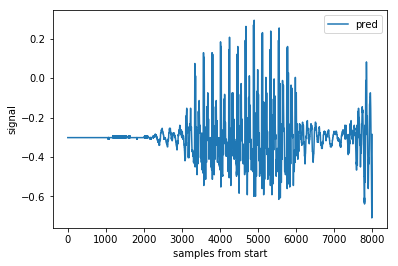

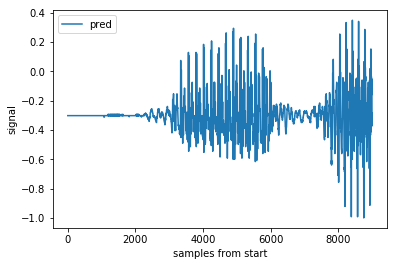

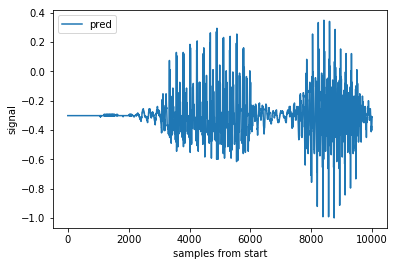

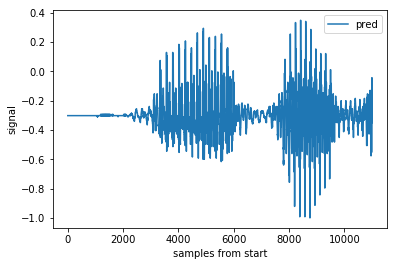

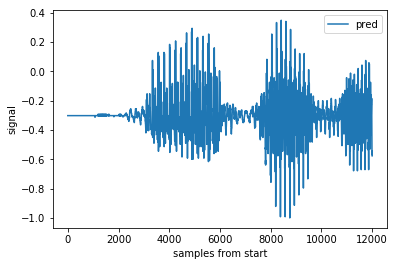

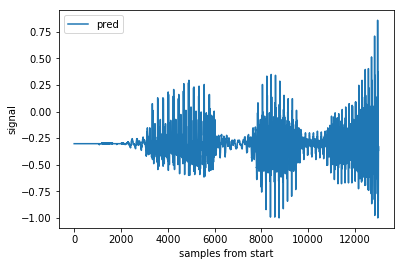

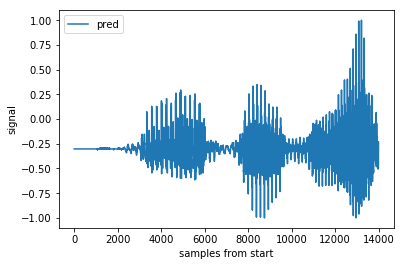

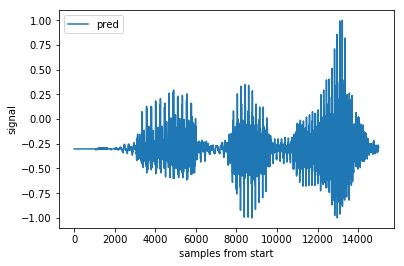

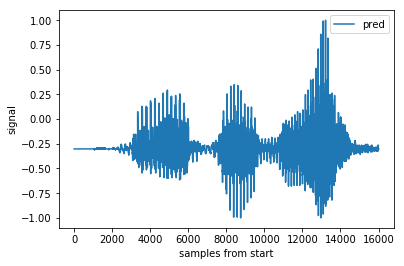

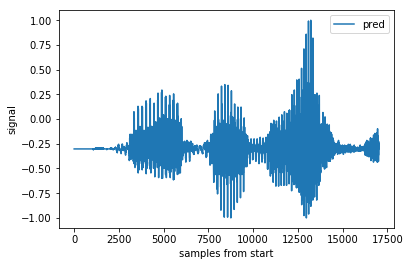

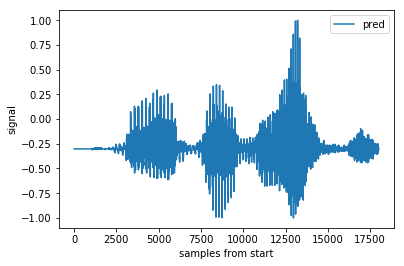

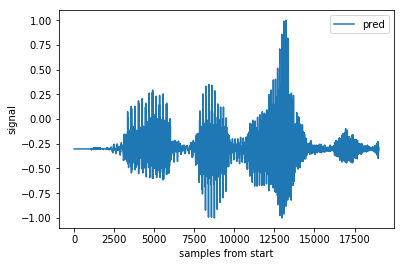

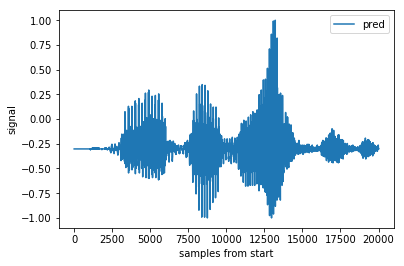

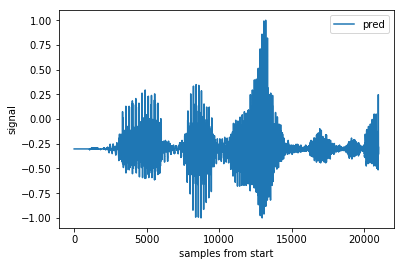

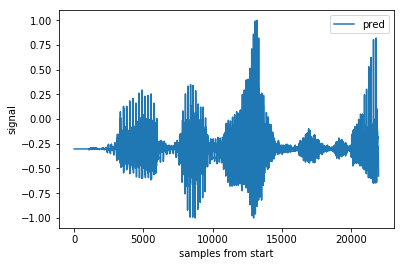

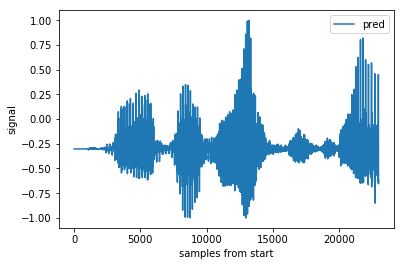

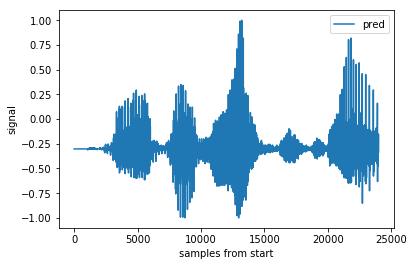

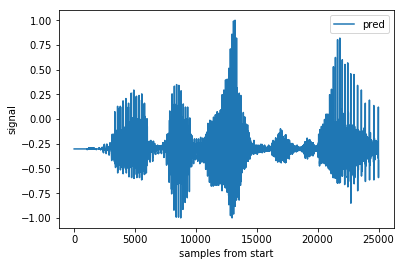

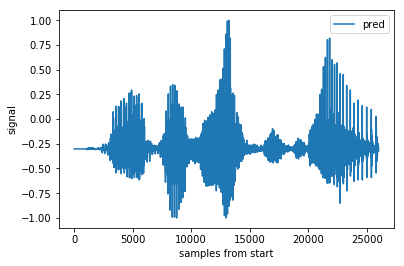

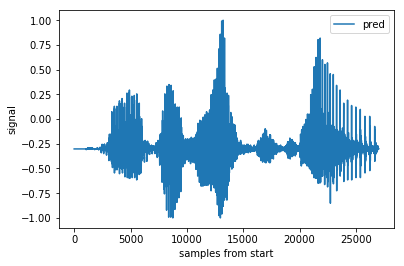

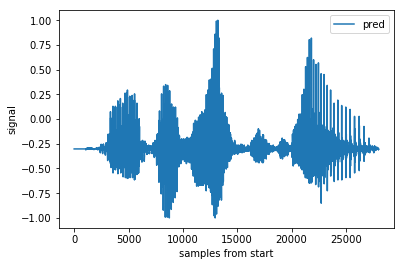

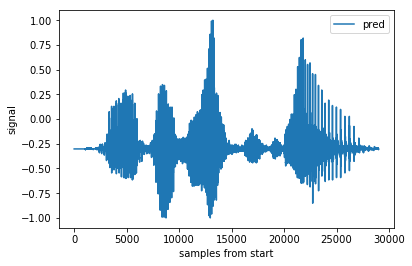

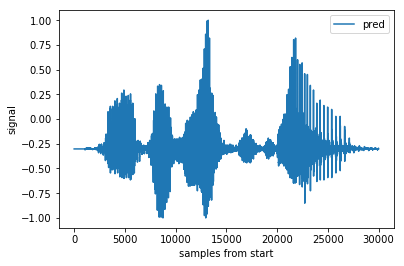

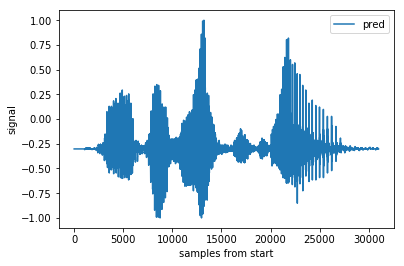

Generating took 47.1783220768 seconds.


In [3]:
generator = Generator(model)

# Get first sample of input
input_ = inputs[:, 0:1, 0]

tic = time()
predictions = generator.run(input_, 32000)
toc = time()
print('Generating took {} seconds.'.format(toc-tic))

In [4]:
Audio(predictions, rate=44100)